## 3.1 Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
# Скроем предупреждения из библиотек, содержащие информацию об изменениях в грудящих версиях
# т.к. в процессе работы классификаторов их будет чрезмерно много
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train_data.csv", index_col=0)
test = pd.read_csv("test_data.csv", index_col=0)
# Разность количества различных значений в выборках
len(train['recipient'].value_counts())-len(test['recipient'].value_counts())

30

In [3]:
data=pd.read_csv("data.csv", index_col=0)
len(data['recipient'])

3360

In [4]:
data2=data
count = data2['recipient'].value_counts()
data2 = data2.loc[data['recipient'].isin(count[count > 10].index)]
data2['recipient'].value_counts()

Глушко Д.Е.          973
Уразов Р.Н.          904
Лысова С.И.          227
Крайчинская С.Б.     219
Тымчиков А.Ю.        213
Никул Е.В.           116
Куколев С.В.         114
Митяева И.В.          81
Саликова К.В.         73
Гонтарь М.А.          57
Хворостяная И.В.      55
Недоспасова О.В.      44
Мухаметзянов Д.Ф.     42
Миронова С.В.         31
Уфимцев Д.А.          30
Иванюк Л.А.           18
Антонов Ю.В.          17
Суперекин И.Ю.        15
Лошкарева Е.П.        14
Алимов А.А.           12
Name: recipient, dtype: int64

Как видим, количество классов стало гораздо меньше, что улучшит качество работы модели за счет исключения единичных случаев отправки письма редкому адресату. Проведем аналогичное действие с полем авторов. Теперь посчитаем количество записей с авторами, которые присылали письма более 5 раз

In [5]:
data2=data
count = data2['author'].value_counts()
true_if_more_than_5=data2['author'].isin(count[count > 5].index)
true_if_more_than_5.value_counts()

False    2160
True     1200
Name: author, dtype: int64

In [6]:
data2.loc[data2['author'].isin(count[count <6].index),"author"]="Other"
len(data2['author'].value_counts())

109

In [7]:
data2['organization'].value_counts()

Аппарат Правительства Российской Федерации                                             60
Комитет по образованию Правительства Санкт-Петербурга                                  43
АНО "Дирекция спортивных и социальных проектов"                                        42
Автономная некоммерческая организация "Центр развития профессиональных компетенций"    32
Департамент образования Ивановской области                                             31
                                                                                       ..
ЧПОУ "Северо-Кавказский колледж инновационных технологий"                               1
Leadership Management International                                                     1
WorldSkills Казахстан                                                                   1
Правительство Воронежской области                                                       1
Администрация Брянской области                                                          1
Name: orga

In [8]:
def getOrgType(i):
    inp = i
    # Приводим к нижнему регистру для обработки первых слов в предложении
    inp=str(inp).lower()
    pos=inp.find('департамент')
    if (pos!=-1):
        return "Департамент n"
    pos=inp.find('правительство')
    if (pos!=-1):
        return "Правительство n"
    pos=inp.find('колледж')
    if (pos!=-1):
        return "Колледж n"
    pos=inp.find('техникум')
    if (pos!=-1):
        return "Колледж n"
    pos=inp.find('университет')
    if (pos!=-1):
        return "Университет n"
    pos=inp.find('губернатор')
    if (pos!=-1):
        return "Губернатор n"
    pos=inp.find('администрация')
    if (pos!=-1):
        return "Администрация n"
    pos=inp.find('федеральн')
    if (pos!=-1):
        return "Федеральный"
    pos=inp.find('ооо')
    if (pos!=-1):
        return "Частн."
    pos=inp.find('ао')
    if (pos!=-1):
        return "Частн."
    pos=inp.find('ао')
    if (pos!=-1):
        return "Частн."
    pos=inp.find('акционерное обществ')
    if (pos!=-1):
        return "Частн."
    pos=inp.find('ано')
    if (pos!=-1):
        return "Частн."
    pos=inp.find('компан')
    if (pos!=-1):
        return "Частн."
    pos=inp.find('ркц')
    if (pos!=-1):
        return "КЦ"
    pos=inp.find('координацион')
    if (pos!=-1):
        return "КЦ"
    pos=inp.find('комитет')
    if (pos!=-1):
        return "Комитет n"
    pos=inp.find('форум')
    if (pos!=-1):
        return "Форум n"
    pos=inp.find('гку')
    if (pos!=-1):
        return "гку"
    pos=inp.find('без автора')
    if (pos!=-1):
        return "Other"
    return i

In [9]:
data2['organization']=data2['organization'].apply(getOrgType)
data2['organization'].value_counts()

Частн.                                                                            520
Университет n                                                                     445
Колледж n                                                                         403
Департамент n                                                                     312
КЦ                                                                                229
                                                                                 ... 
Волгоградская региональная гостиничная ассоциация                                   1
ФГАУ "Фонд новых форм развития образования"                                         1
Ассоциация предприятий черной металлургии Русская сталь                             1
Рабочая группа Госудасртвенного совета РФ по направлению "Образование и наука"      1
01 физическое лицо                                                                  1
Name: organization, Length: 379, dtype: int64

Все невошедшие в группы значения, встречающиеся не более 5 раз, объединим в группу "Other"

In [10]:
count = data2['organization'].value_counts()
data2.loc[data2['organization'].isin(count[count < 6].index),"organization"]="Other"
len(data2['organization'].value_counts())

36

In [11]:
data2

,recipient,author,organization,competition казани,euroskills competition,euroskills санкт,futureskills мировом,hi tech,logisticskills пленарном,russia повторное,...,экономического форума,экономическом форуме,эксперта компатриота,эксперта компетенции,экспертного совета,экспертной группы,экспертный совет,электромонтажу worldskills,этапа конкурса,этапе конкурса
0,Уразов Р.Н.,Other,Частн.,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Уразов Р.Н.,Other,Администрация n,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Уразов Р.Н.,Other,Университет n,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Миронова С.В.,Other,Губернатор n,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Тымчиков А.Ю.,Other,Университет n,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,Уразов Р.Н.,Райдер А.В.,Департамент n,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3356,Уразов Р.Н.,Other,Частн.,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3357,Уразов Р.Н.,Other,Other,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3358,Уразов Р.Н.,Other,Администрация n,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
enc = preprocessing.OneHotEncoder()
enc2 = preprocessing.OneHotEncoder()
x1=pd.DataFrame(data2['author'])
x1=x1.apply(le.fit_transform)
enc.fit(x1)
onehot1 = enc.transform(x1).toarray()
x2=pd.DataFrame(data2['organization'])
x2=x2.apply(le2.fit_transform)
enc2.fit(x2)
onehot2 = enc2.transform(x2).toarray()
onehot2.shape

(3360, 36)

OneHotEncoder возвращает вместо столбца данных матрицу, где столбцы - это все возможные значения поля, а значения в соответствующих строках - соответствие (1) или несоответствие (0) значения ячейки в исходном столбце со значением нового столбца

In [13]:
oh1=pd.DataFrame(onehot1)
oh1.columns=le.classes_
oh2=pd.DataFrame(onehot2)
oh2.columns=le2.classes_
oh1.head(n=10)

,Other,Абрамов С.А.,Ажгиревич А.И.,Александров А.А.,Александрова М.В.,Анисимов Н.Ю.,Антонова О.Г.,Аристова В.А.,Артемьев И.А.,Багров Ю.Н.,...,Шебанов А.Н.,Шевцова Т.А.,Шепелева Л.Ю.,Шолохова И.В.,Шохин А.,Щелкун Н.И.,Щербаков В.Н.,Эрдниев Г.Ц.,Юрьева С.Н.,Ярыгин Д.В.
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df=pd.concat([data2.drop(['author','organization'], axis=1),oh1,oh2],axis=1)
df.head()

,recipient,competition казани,euroskills competition,euroskills санкт,futureskills мировом,hi tech,logisticskills пленарном,russia повторное,russia субъекте,russia форум,...,Севастопольский центр развития образования,Торгово-промышленная палата Российской Федерации,Университет n,Управление образования и науки Липецкой области,Управление образования и науки Тамбовской области,"ФГБОУ ВПО ""Югорский государственный униврситет""",Федеральный,Форум n,ЧОУ ВО «Международный Институт Дизайна и Сервиса»,Частн.
0,Уразов Р.Н.,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Уразов Р.Н.,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Уразов Р.Н.,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Миронова С.В.,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Тымчиков А.Ю.,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn.model_selection import train_test_split
x=df.drop(['recipient'], axis=1)
y=df['recipient']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, shuffle=True, random_state=2)

## 3.2 Обучение

In [16]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.naive_bayes import MultinomialNB as NB
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.multiclass import OneVsRestClassifier as OVRC

### Способы оценки качества работы модели
Изначальным способом оценки модели является сравниние ее точности с долей доминирующего в выборке класса. Для ее получения выведем частотные показатели целевой переменной в выборке. Этот показатель определяет точность классификатора, который всегда предсказывает самый популярный класс

In [17]:
df['recipient'].value_counts(normalize=True)

Глушко Д.Е.         0.289583
Уразов Р.Н.         0.269048
Лысова С.И.         0.067560
Крайчинская С.Б.    0.065179
Тымчиков А.Ю.       0.063393
                      ...   
Трофимов А.В.       0.000298
Гайдаев М.И.        0.000298
Тунина К.В.         0.000298
Нерезькова И.В.     0.000298
Попова Я.Д.         0.000298
Name: recipient, Length: 61, dtype: float64

Если полученная точность модели превысит 0.29, то можно говорить, что обучение дало результат.

### Ансамбль LogisticRegressor'ов

In [18]:
LRsubclassifier=LR(random_state=1)
LRclassifier=OVRC(estimator=LRsubclassifier)
LRclassifier.fit(x_train, y_train)
print("Точность на обучающей выборке:",LRclassifier.score(x_train, y_train))
print("Точность на тестовой выборке:",LRclassifier.score(x_test, y_test))

Точность на обучающей выборке: 0.7869047619047619
Точность на тестовой выборке: 0.6446428571428572


### Random Forest Classifier

In [19]:
RFclassifier=RF(random_state=1)
RFclassifier.fit(x_train, y_train)
print("Точность на обучающей выборке:",RFclassifier.score(x_train, y_train))
print("Точность на тестовой выборке:",RFclassifier.score(x_test, y_test))

Точность на обучающей выборке: 0.9422619047619047
Точность на тестовой выборке: 0.6041666666666666


### Naive Bayes

In [20]:
NBclassifier=NB()
NBclassifier.fit(x_train, y_train)
print("Точность на обучающей выборке:",NBclassifier.score(x_train, y_train))
print("Точность на тестовой выборке:",NBclassifier.score(x_test, y_test))

Точность на обучающей выборке: 0.7035714285714286
Точность на тестовой выборке: 0.6101190476190477


### K-Neighbours

In [21]:
KNclassifier=KN()
KNclassifier.fit(x_train, y_train)
print("Точность на обучающей выборке:",KNclassifier.score(x_train, y_train))
print("Точность на тестовой выборке:",KNclassifier.score(x_test, y_test))

Точность на обучающей выборке: 0.6791666666666667
Точность на тестовой выборке: 0.5488095238095239


### Визуализация работы модели

In [22]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [23]:
# Метод predict получает предсказания целевой переменной по набору параметров
y_p_train=LRclassifier.predict(x_train)
y_p_test=LRclassifier.predict(x_test) 

#### Матрица ошибок на обучающей выборке

<AxesSubplot:>

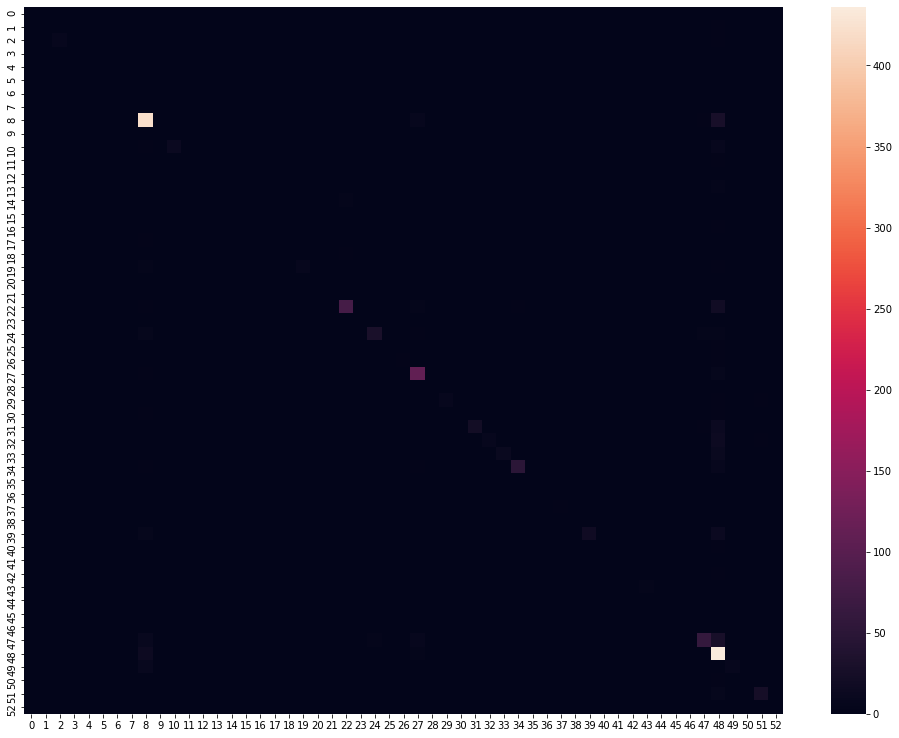

In [24]:
plt.figure(figsize=(17,13))
sb.heatmap(confusion_matrix(y_train, y_p_train))

#### Матрица ошибок на тестовой выборке

<AxesSubplot:>

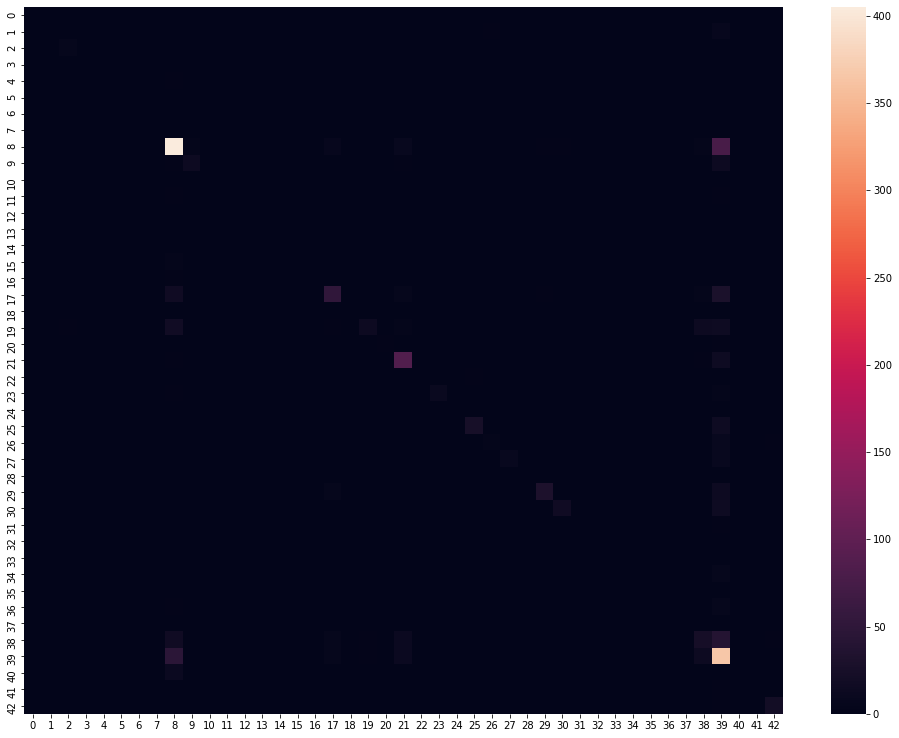

In [25]:
plt.figure(figsize=(17,13))
sb.heatmap(confusion_matrix(y_test, y_p_test))

На матрице видно, что модель часто путает популярные классы с порядковыми номероами 8 и 39, и в целом относительно часто ошибочно выдает класс 39 как предсказание, что сильно портит показатели модели. Однако, в остальном, модель стабильно справляется с предсказанием адресата.